In [1]:
!pip install keras_facenet 


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.8 MB/s eta 0:00:00
  Created wheel for keras_facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10367 sha256=26f0f197506b8664f4750a1feb3fc94c30230a845b3c9275c22a50ee3d9ad8b5
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras_facenet


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_22            │ (None, 100, 100, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_23            │ (None, 100, 100, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_14             │ (None, 128)            │     15,304,640 │ input_layer_22[0][0],  │
│ (Functional)              │                        │                │ input_layer_23[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_7 (Lambda)         │ (None, 1)              │              0 │ functional_14[0][0],   │
│                           │                        │                │ functional_14[1][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 1)              │              2 │ lambda_7[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 15,304,642 (58.38 MB)

 Trainable params: 15,304,642 (58.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 23s 390ms/step - accuracy: 0.8309 - loss: 0.6784 - val_accuracy: 0.0000e+00 - val_loss: 0.7830
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 263ms/step - accuracy: 0.8309 - loss: 0.6074 - val_accuracy: 0.0000e+00 - val_loss: 2.1297
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 267ms/step - accuracy: 0.8342 - loss: 0.5363 - val_accuracy: 0.0000e+00 - val_loss: 1.2172
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 271ms/step - accuracy: 0.8272 - loss: 0.5431 - val_accuracy: 0.0000e+00 - val_loss: 1.8578
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 268ms/step - accuracy: 0.8187 - loss: 0.5608 - val_accuracy: 0.0000e+00 - val_loss: 1.0028
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 263ms/step - accuracy: 0.8343 - loss: 0.5272 - val_accuracy: 0.0000e+00 - val_loss: 1.8662
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 261ms/step - accuracy: 0.8277 - loss: 0.5265 - val_accuracy: 0.0000e+00 - val_loss: 0.9522
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 259ms/step - accuracy: 0.82

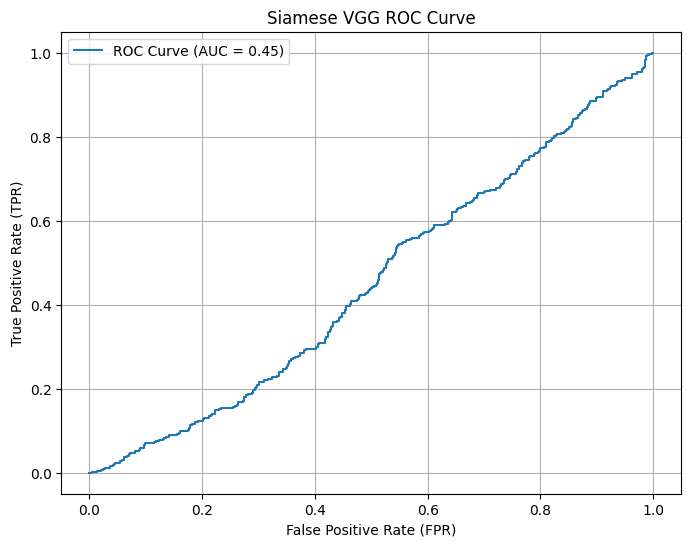

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylimit'

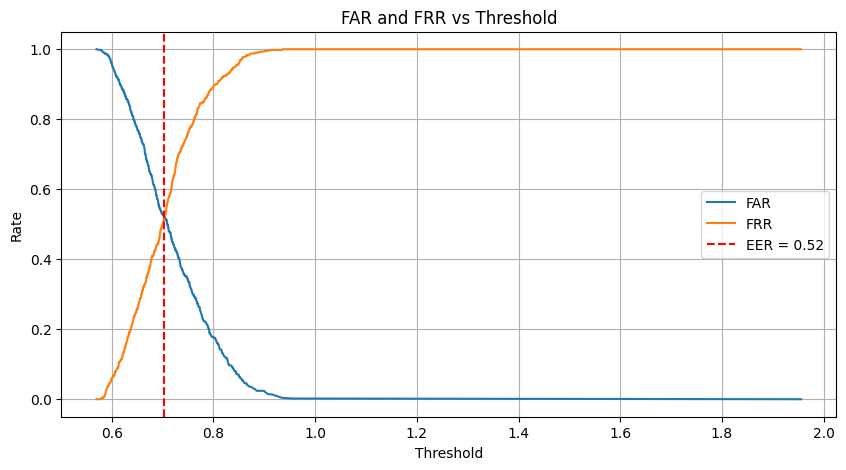

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from sklearn.datasets import fetch_lfw_pairs
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the LFW dataset
def load_lfw_pairs():
    lfw_pairs_train = fetch_lfw_pairs(subset="train", resize=0.5, color=True, funneled=True)
    train_pairs, train_labels = lfw_pairs_train.pairs, lfw_pairs_train.target

    lfw_pairs_test = fetch_lfw_pairs(subset="test", resize=0.5, color=True, funneled=True)
    test_pairs, test_labels = lfw_pairs_test.pairs, lfw_pairs_test.target

    train_pairs = resize_images(train_pairs, target_size=(100, 100))
    test_pairs = resize_images(test_pairs, target_size=(100, 100))

    train_pairs = train_pairs / 255.0
    test_pairs = test_pairs / 255.0

    return train_pairs, train_labels, test_pairs, test_labels

def resize_images(image_pairs, target_size=(100, 100)):
    resized_images = []
    for img_pair in image_pairs:
        img1_resized = resize_image(img_pair[0], target_size)
        img2_resized = resize_image(img_pair[1], target_size)
        resized_images.append([img1_resized, img2_resized])
    return np.array(resized_images)

def resize_image(image, target_size):
    image = tf.image.resize(image, target_size)
    return image

# Step 2: Define the VGG-based Siamese model
def create_vgg_siamese_model():
    input_shape = (100, 100, 3)
    base_model = VGG16(include_top=False, weights="imagenet", input_shape=input_shape)

    # Adding a custom head
    flat = layers.Flatten()(base_model.output)
    dense = layers.Dense(128, activation='relu')(flat)
    embedding_model = models.Model(inputs=base_model.input, outputs=dense)

    # Define inputs for Siamese network
    input_1 = layers.Input(shape=input_shape)
    input_2 = layers.Input(shape=input_shape)

    # Embeddings for both inputs
    emb1 = embedding_model(input_1)
    emb2 = embedding_model(input_2)

    # Euclidean distance between the embeddings
    distance = layers.Lambda(lambda tensors: tf.norm(tensors[0] - tensors[1], axis=-1, keepdims=True))([emb1, emb2])
    output = layers.Dense(1, activation='sigmoid')(distance)

    siamese_model = models.Model(inputs=[input_1, input_2], outputs=output)
    siamese_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return siamese_model

# Step 3: Prepare the data
def prepare_data(pairs, labels):
    pair_1 = pairs[:, 0]
    pair_2 = pairs[:, 1]
    return [pair_1, pair_2], labels

# Load dataset
train_pairs, train_labels, test_pairs, test_labels = load_lfw_pairs()
train_pairs_input, train_labels = prepare_data(train_pairs, train_labels)
test_pairs_input, test_labels = prepare_data(test_pairs, test_labels)

# Create and train the Siamese model
vgg_siamese_model = create_vgg_siamese_model()
vgg_siamese_model.summary()

history = vgg_siamese_model.fit(train_pairs_input, train_labels, epochs=10, batch_size=32, validation_split=0.4)

# Step 4: Evaluate and calculate metrics including FAR, FRR, and EER
def calculate_metrics(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    # FAR and FRR for each threshold
    far_list = []
    frr_list = []

    for threshold in thresholds:
        false_accepts = np.sum((y_pred >= threshold) & (y_true == 0))
        true_rejects = np.sum((y_pred < threshold) & (y_true == 0))
        false_rejects = np.sum((y_pred < threshold) & (y_true == 1))
        true_accepts = np.sum((y_pred >= threshold) & (y_true == 1))

        far = false_accepts / (false_accepts + true_rejects + 1e-10)
        frr = false_rejects / (false_rejects + true_accepts + 1e-10)

        far_list.append(far)
        frr_list.append(frr)

    # EER: Find threshold where FAR = FRR
    eer_index = np.argmin(np.abs(np.array(far_list) - np.array(frr_list)))
    eer_threshold = thresholds[eer_index]
    eer_value = far_list[eer_index]

    return fpr, tpr, roc_auc, far_list, frr_list, thresholds, eer_threshold, eer_value

# Predict on test set
y_pred = vgg_siamese_model.predict(test_pairs_input).flatten()

fpr, tpr, roc_auc, far_list, frr_list, thresholds, eer_threshold, eer_value = calculate_metrics(test_labels, y_pred)

# Step 5: Visualize metrics
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Siamese VGG ROC Curve")
plt.legend()
plt.grid()
plt.show()

# FAR vs FRR Curve
plt.figure(figsize=(10, 5))
plt.plot(thresholds, far_list, label='FAR')
plt.plot(thresholds, frr_list, label='FRR')
plt.axvline(eer_threshold, color='r', linestyle='--', label=f'EER = {eer_value:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('FAR and FRR vs Threshold')
plt.legend()
plt.grid(True)
plt.ylimit([0,1])
plt.show()

# Print EER
print(f"The Equal Error Rate (EER) is {eer_value:.2f} at a threshold of {eer_threshold:.2f}.")


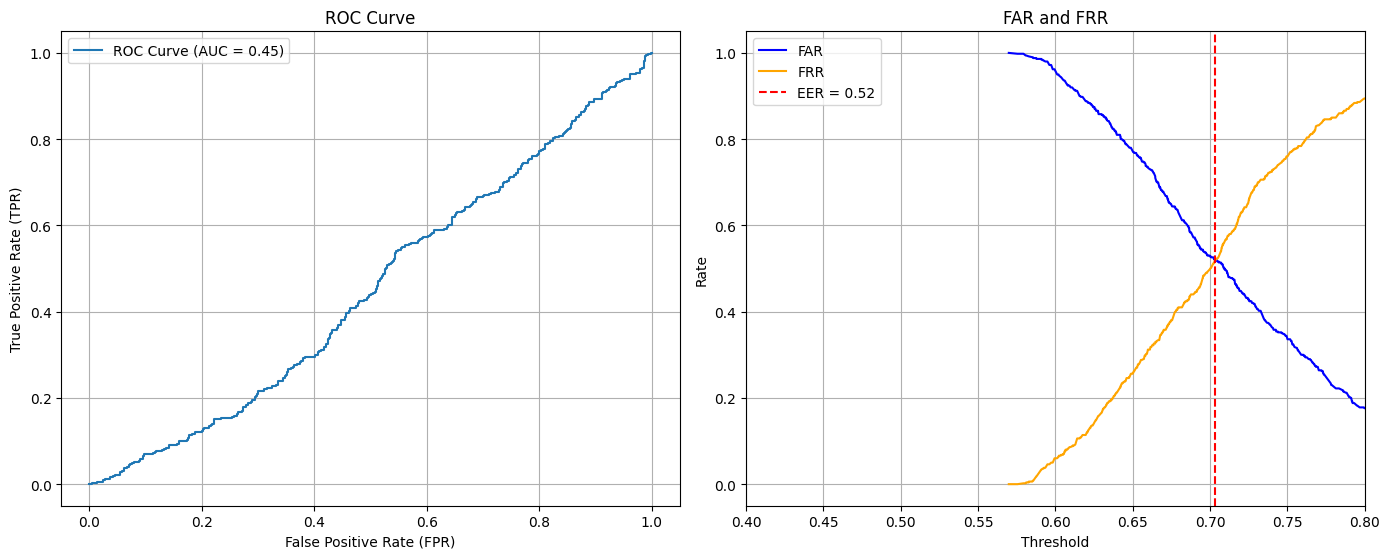

In [11]:
plt.figure(figsize=(14, 6))  # Larger figure for better display

# Add a main title

# ROC Curve
plt.subplot(121)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve", fontsize=12)
plt.legend()
plt.grid()

# FAR vs FRR Curve
plt.subplot(122)
plt.plot(thresholds, far_list, label='FAR', color='blue')
plt.plot(thresholds, frr_list, label='FRR', color='orange')
plt.axvline(eer_threshold, color='r', linestyle='--', label=f'EER = {eer_value:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('FAR and FRR', fontsize=12)
plt.legend()
plt.grid(True)
plt.xlim([0.4, 0.8])

# Tight layout and save
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for the suptitle
plt.savefig("VGG16_Performance_s.png")  # Save the figure
plt.show()
